# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import random 
import seaborn as sns
import plotly as pt
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_absolute_percentage_error, RocCurveDisplay 

# Load Data

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# Data information

In [6]:
df.shape

(545, 13)

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Observe the distribution of features**

In [10]:
df_columns = df.columns
df_columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
for i in df_columns:
    print(df[i].unique())

[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  4900000  4893

In [12]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [13]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

**Duplicated Values Check**

In [14]:
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


**Missing Values Check**

In [15]:
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [17]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
df.price.describe(percentiles = [0.25, 0.50, 0.75, 0.85, 0.90,1])

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
85%      6.615000e+06
90%      7.350000e+06
100%     1.330000e+07
max      1.330000e+07
Name: price, dtype: float64

In [19]:
Category_features = ["mainroad","guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
Numeric_features = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]

# lst_object_data = [i for i in df.columns if df[i].dtype == "object"]

In [20]:
numerical_list = [x for x in df.columns if df[x].dtype in ("int64", "float64")]
numerical_list  # Numeric_features

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [21]:
for i in Category_features:
    print(i)

mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


In [22]:
# dummy_mainroad = pd.get_dummies(df["mainroad"], drop_first= True)
# dummy_guestroom = pd.get_dummies(df["guestroom"], drop_first= True)
# dummy_hotwaterheating = pd.get_dummies(df["hotwaterheating"], drop_first= True)
# dummy_basement = pd.get_dummies(df["basement"], drop_first= True)
# dummy_airconditioning = pd.get_dummies(df["airconditioning"], drop_first= True)
# dummy_prefarea = pd.get_dummies(df["prefarea"], drop_first= True)
# dummy_furnishingstatus = pd.get_dummies(df["furnishingstatus"], drop_first= True)

# df.drop(["mainroad", "guestroom", "hotwaterheating", "basement", "airconditioning", "prefarea", "furnishingstatus"], axis= 1, inplace= True)

# df = pd.concat([dummy_mainroad, dummy_guestroom, dummy_hotwaterheating, dummy_basement, dummy_airconditioning, dummy_prefarea, dummy_furnishingstatus], 
                # axis= 1)

# df.columns.astype(str)
# df.head()

In [23]:
df[Category_features].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [24]:
df["furnishingstatus"].head()

0         furnished
1         furnished
2    semi-furnished
3         furnished
4         furnished
Name: furnishingstatus, dtype: object

In [25]:
type_dict = {"unfurnished": 1,
             "semi-furnished": 2,
             "furnished": 3}

df["furnishingstatus"] = df["furnishingstatus"].map(type_dict)
df["furnishingstatus"]

0      3
1      3
2      2
3      3
4      3
      ..
540    1
541    2
542    1
543    3
544    1
Name: furnishingstatus, Length: 545, dtype: int64

In [26]:
df[Category_features].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,3
1,yes,no,no,no,yes,no,3
2,yes,no,yes,no,no,yes,2
3,yes,no,yes,no,yes,yes,3
4,yes,yes,yes,no,yes,no,3


**Convert datatype "string" to "int64" in some categories**

In [27]:
# def dummy(x, df):
#     temp = pd.get_dummies(df[x], drop_first = True).astype(int)
#     df = pd.concat([df, temp], axis = 1)
#     df.drop([x], axis = 1, inplace = True)
#     return df

# df = dummy("mainroad", df)
# df = dummy("guestroom", df)
# df = dummy("hotwaterheating", df)
# df = dummy("basement", df)
# df = dummy("airconditioning", df)
# df = dummy("prefarea", df)
# df = dummy("furnishingstatus", df)

# df.head()

# ****************************** OR *************************************

# col_convert = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

# for col in col_convert:
#     df_1[col], _ = pd.factorize(df[col])
    
# df.head()

# ****************************** OR *************************************

df["mainroad"] = df["mainroad"].astype("category")
df["mainroad"] = df["mainroad"].cat.codes

df["guestroom"] = df["guestroom"].astype("category")
df["guestroom"] = df["guestroom"].cat.codes

df["basement"] = df["basement"].astype("category")
df["basement"] = df["basement"].cat.codes

df["hotwaterheating"] = df["hotwaterheating"].astype("category")
df["hotwaterheating"] = df["hotwaterheating"].cat.codes

df["airconditioning"] = df["airconditioning"].astype("category")
df["airconditioning"] = df["airconditioning"].cat.codes

df["prefarea"] = df["prefarea"].astype("category")
df["prefarea"] = df["prefarea"].cat.codes

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int8 
 6   guestroom         545 non-null    int8 
 7   basement          545 non-null    int8 
 8   hotwaterheating   545 non-null    int8 
 9   airconditioning   545 non-null    int8 
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int8 
 12  furnishingstatus  545 non-null    int64
dtypes: int64(7), int8(6)
memory usage: 33.1 KB


In [29]:
df.cov()
# df[["price", "area", "bedrooms", "bathrooms", "stories", "parking"]].cov()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,3.498544e+12,2.175676e+09,505946.425931,486409.333378,682644.632825,193607.540576,182974.748111,167084.951632,36453.619131,394111.230505,619467.324204,261721.518922,433954.322450
area,2.175676e+09,4.709512e+06,243.232140,211.346617,158.129368,218.558233,116.563411,49.140836,-4.193993,224.507167,659.989696,216.183301,283.276781
bedrooms,5.059464e+05,2.432321e+02,0.544738,0.138674,0.261589,-0.003096,0.022760,0.034299,0.007117,0.055140,0.088562,0.024747,0.069256
bathrooms,4.864093e+05,2.113466e+02,0.138674,0.252476,0.142171,0.007427,0.024329,0.024501,0.007066,0.043689,0.076842,0.013532,0.054921
stories,6.826446e+05,1.581294e+02,0.261589,0.142171,0.752543,0.036809,0.014460,-0.071418,0.003424,0.118480,0.034043,0.016352,0.069135
mainroad,1.936075e+05,2.185582e+02,-0.003096,0.007427,0.036809,0.121546,0.012325,0.007326,-0.000860,0.017097,0.061407,0.029567,0.041601
guestroom,1.829747e+05,1.165634e+02,0.022760,0.024329,0.014460,0.012325,0.146573,0.068025,-0.000826,0.024609,0.012358,0.026137,0.034491
basement,1.670850e+05,4.914084e+01,0.034299,0.024501,-0.071418,0.007326,0.068025,0.228056,0.000438,0.010517,0.021189,0.046216,0.041025
hotwaterheating,3.645362e+04,-4.193993e+00,0.007117,0.007066,0.003424,-0.000860,-0.000826,0.000438,0.043848,-0.012665,0.012244,-0.005279,0.005042
airconditioning,3.941112e+05,2.245072e+02,0.055140,0.043689,0.118480,0.017097,0.024609,0.010517,-0.012665,0.216392,0.063795,0.023169,0.053295


In [30]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


# Data Visulization

<Axes: >

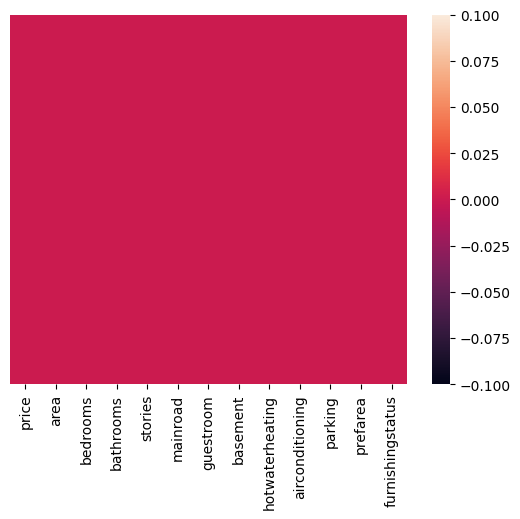

In [31]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= True)

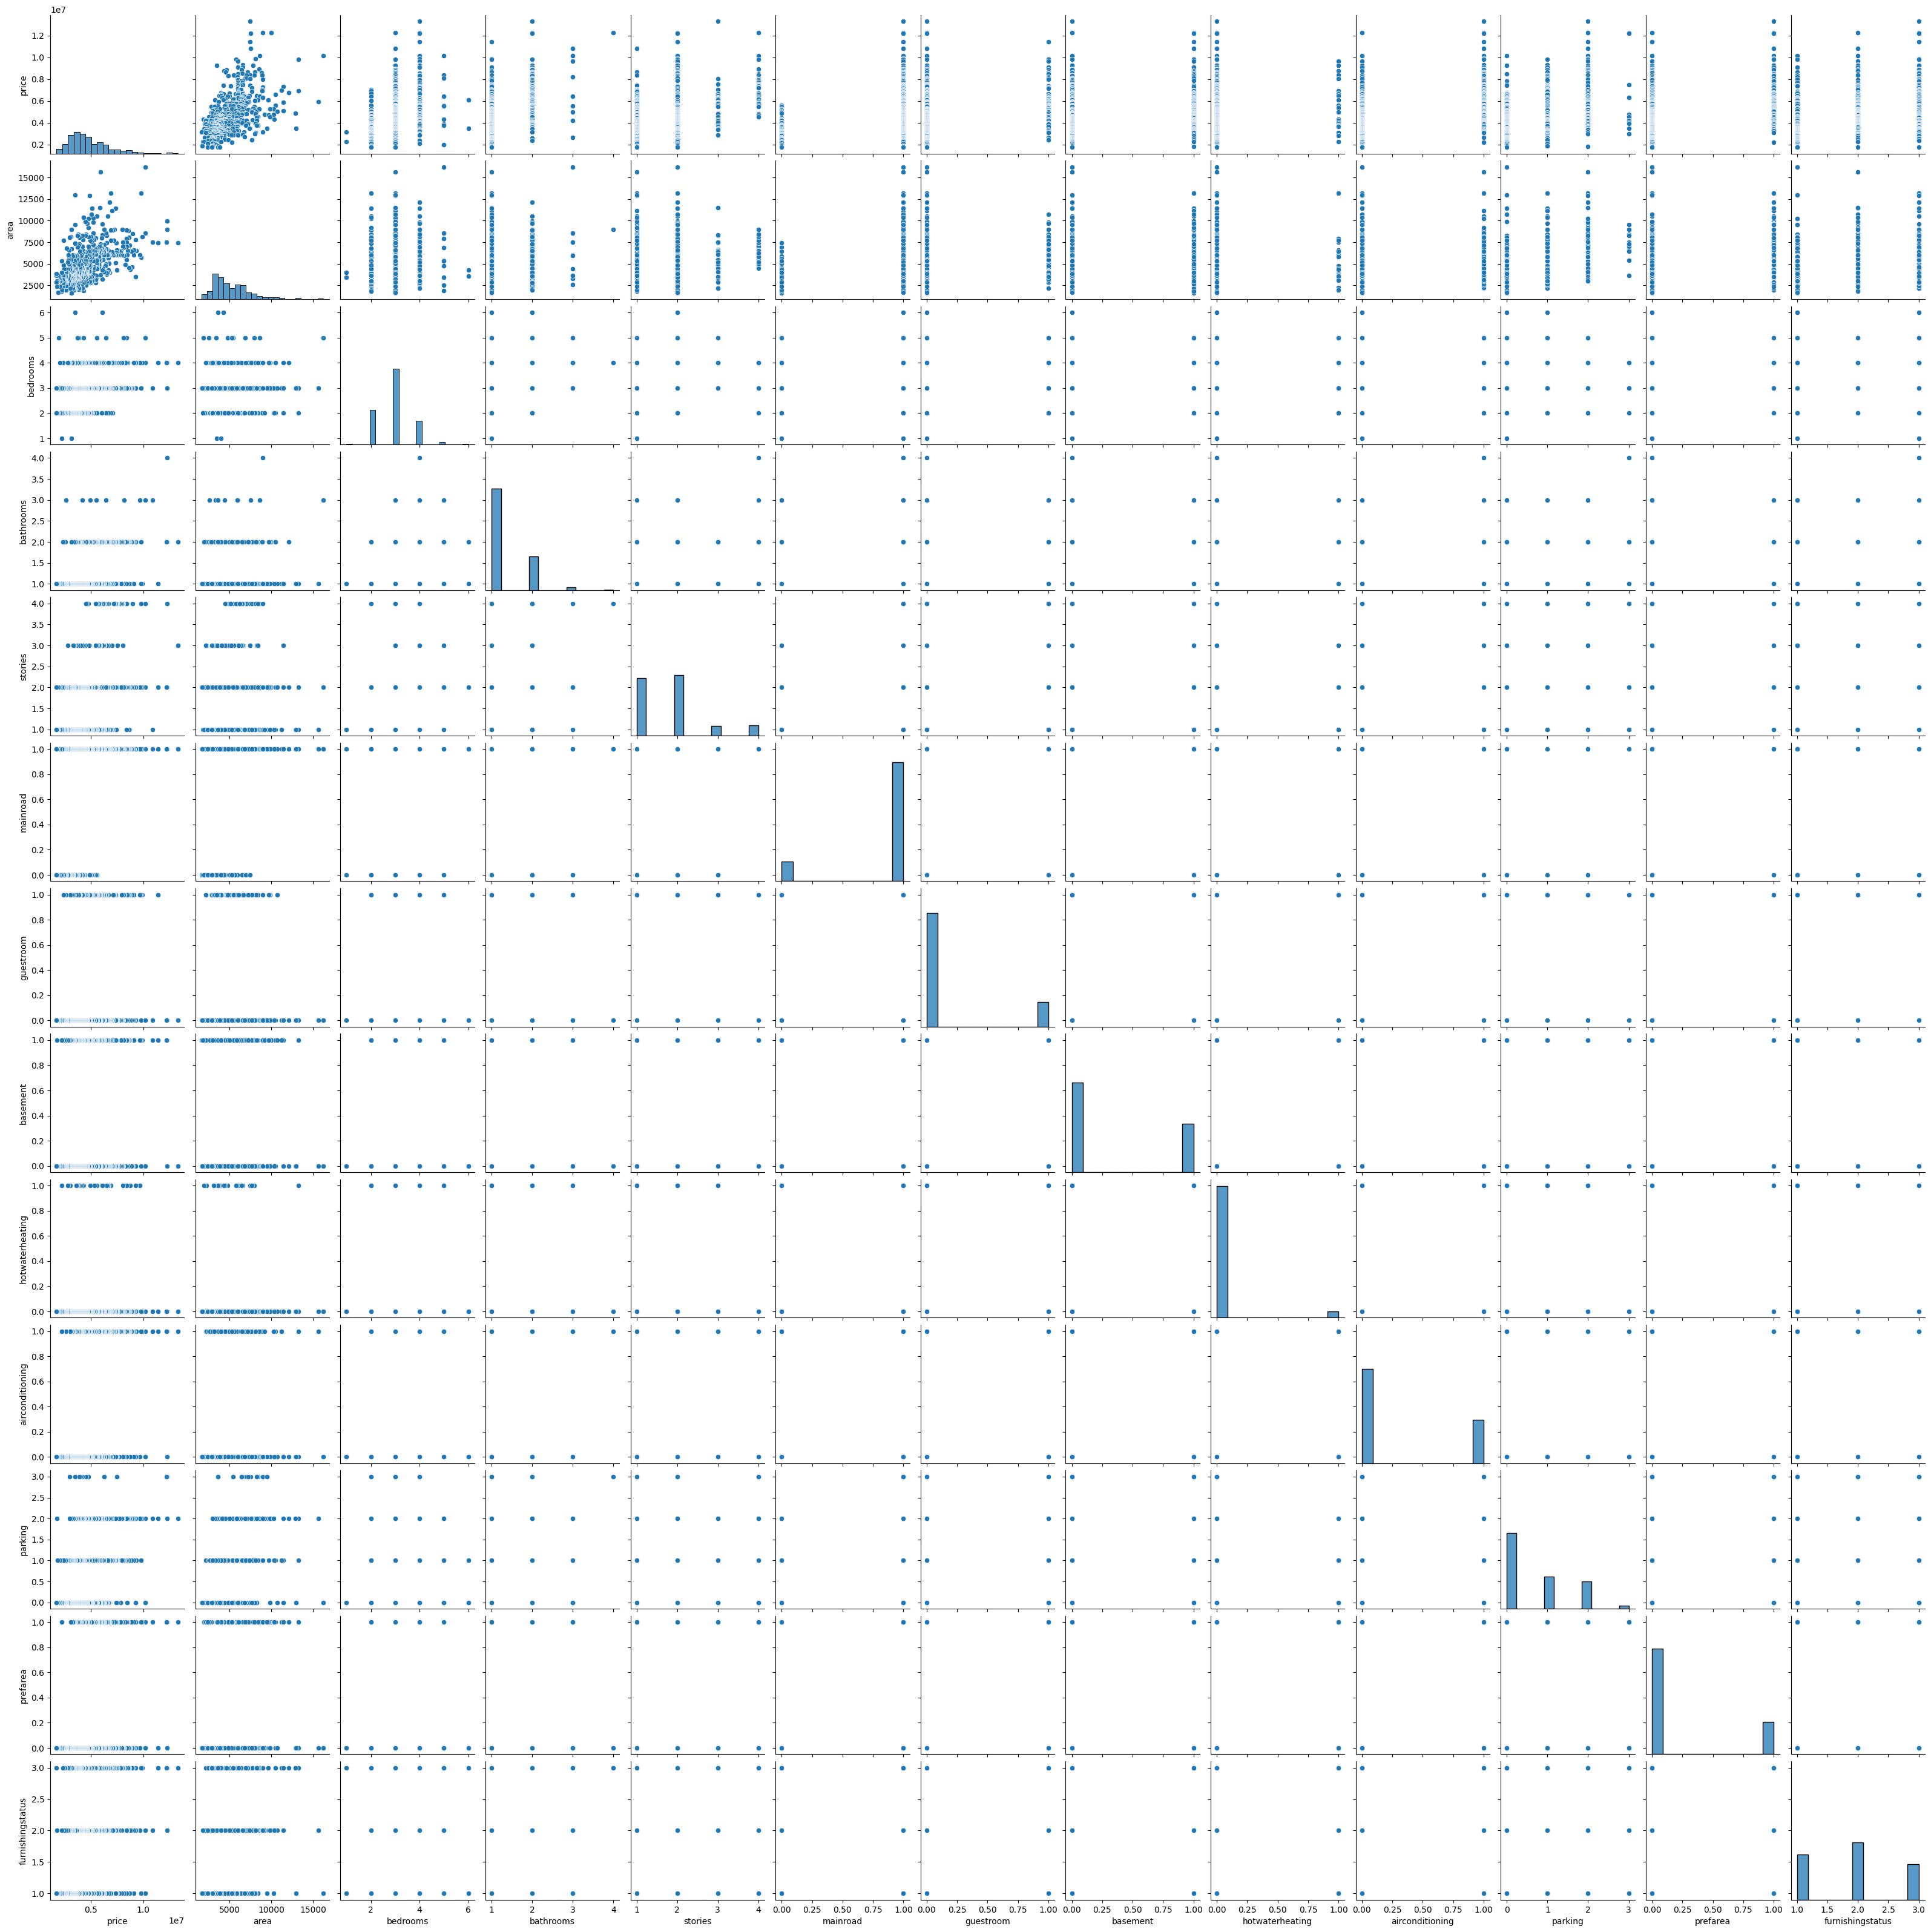

In [32]:
sns.pairplot(df)

In [33]:
df["bedrooms"].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

<Axes: xlabel='bedrooms', ylabel='count'>

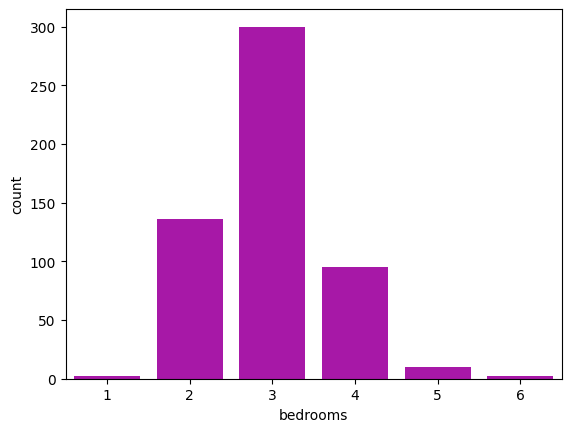

In [34]:
sns.countplot(data= df, x= df["bedrooms"], color= "m")

In [35]:
df["bathrooms"].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

<Axes: xlabel='bathrooms', ylabel='count'>

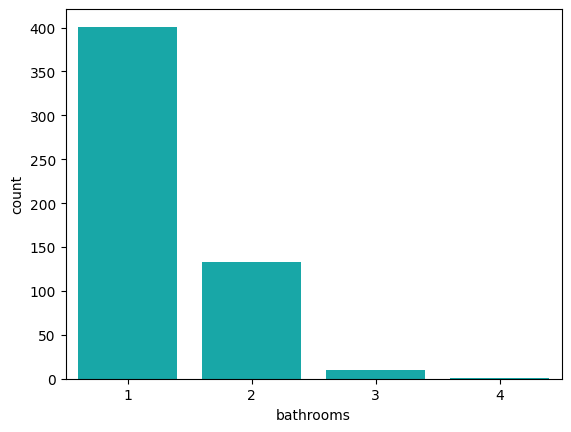

In [36]:
sns.countplot(data= df, x= df["bathrooms"], color= "c")

In [37]:
df["parking"].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

<Axes: xlabel='parking', ylabel='count'>

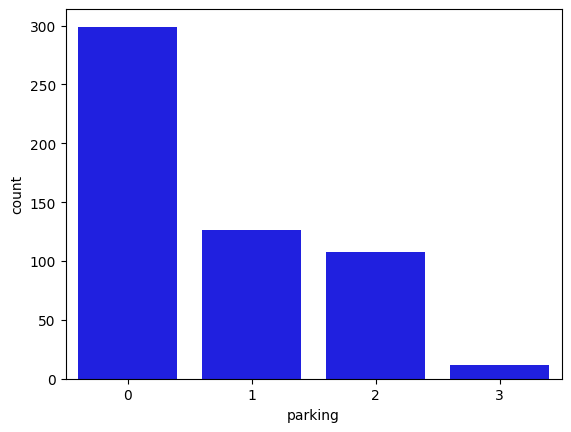

In [38]:
sns.countplot(data= df, x= df["parking"], color= "b")

In [39]:
df["mainroad"].value_counts()

mainroad
1    468
0     77
Name: count, dtype: int64

In [40]:
df["stories"].value_counts()

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

In [41]:
df["guestroom"].value_counts()

guestroom
0    448
1     97
Name: count, dtype: int64

In [42]:
df["basement"].value_counts()

basement
0    354
1    191
Name: count, dtype: int64

In [43]:
df["hotwaterheating"].value_counts()

hotwaterheating
0    520
1     25
Name: count, dtype: int64

In [44]:
df["airconditioning"].value_counts()

airconditioning
0    373
1    172
Name: count, dtype: int64

In [45]:
df["prefarea"].value_counts()

prefarea
0    417
1    128
Name: count, dtype: int64

In [46]:
df["furnishingstatus"].value_counts()

furnishingstatus
2    227
1    178
3    140
Name: count, dtype: int64

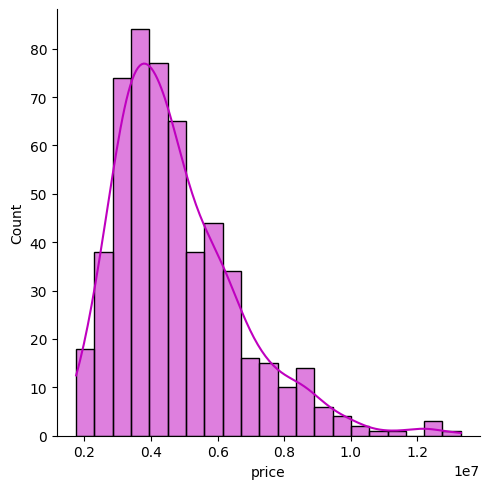

In [47]:
sns.displot(df["price"], kde= True, color= "m")

<Axes: xlabel='area', ylabel='price'>

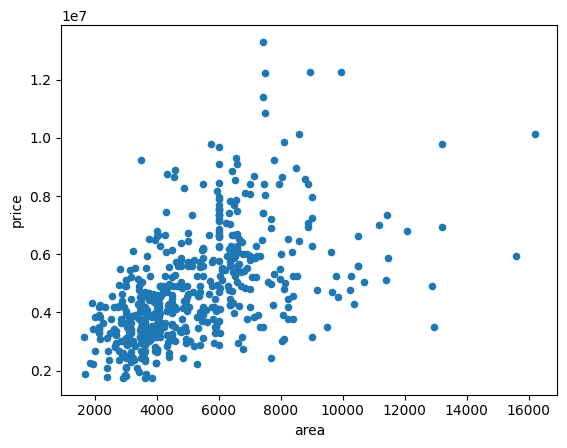

In [48]:
df.plot("area", "price", kind= "scatter" )

[Text(0.5, 0, 'prefarea'), Text(0, 0.5, 'Frequency of prefarea')]

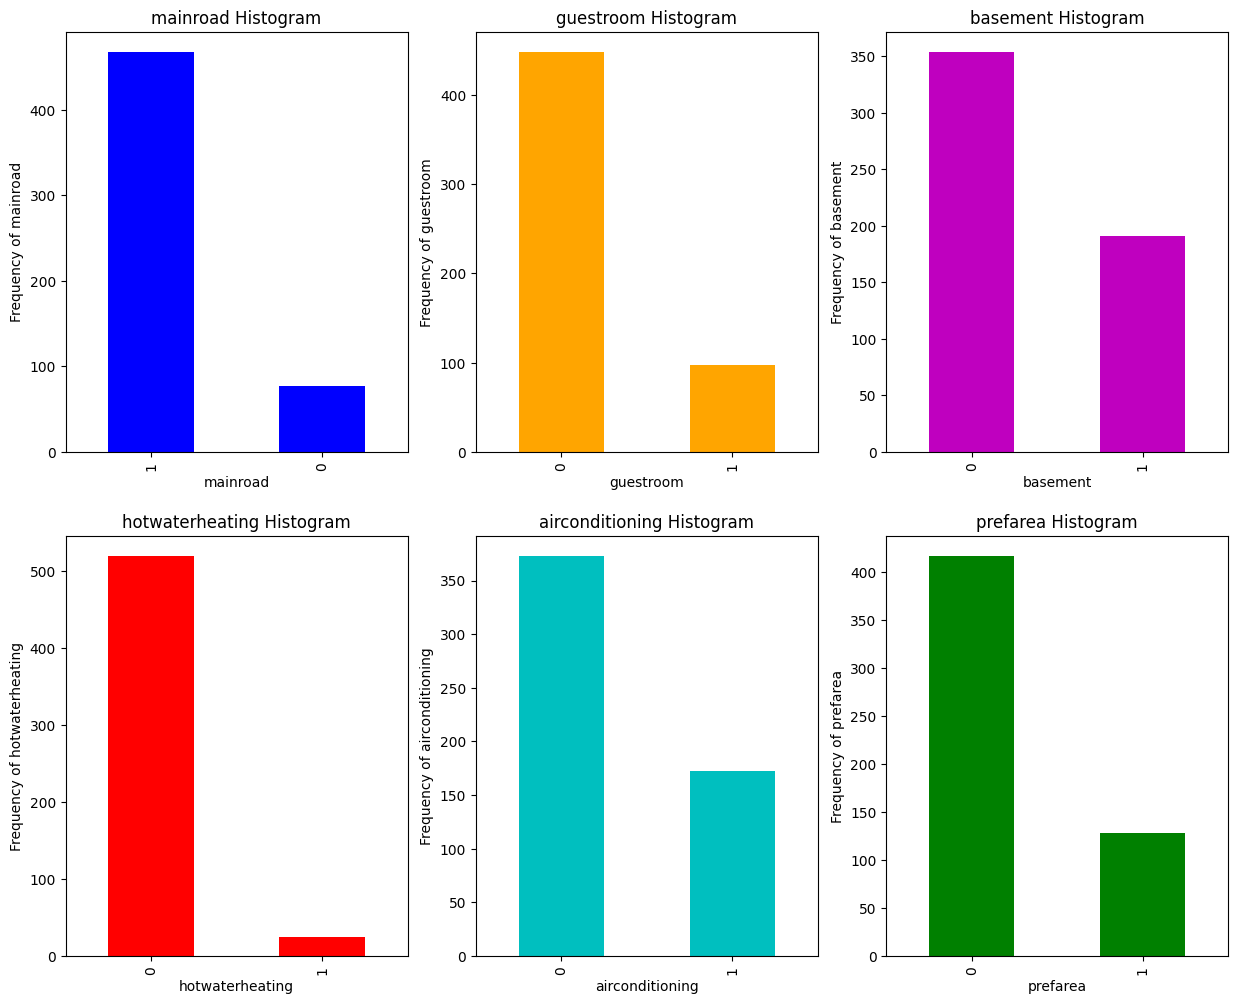

In [49]:
plt.figure(figsize= (15, 12))

plt.subplot(2, 3, 1)
plt_1 = df["mainroad"].value_counts().plot(kind= "bar", color= "b")
plt.title("mainroad Histogram")
plt_1.set(xlabel= "mainroad", ylabel= "Frequency of mainroad")

plt.subplot(2, 3, 2)
plt_2 = df["guestroom"].value_counts().plot(kind= "bar", color= "orange")
plt.title("guestroom Histogram")
plt_2.set(xlabel= "guestroom", ylabel= "Frequency of guestroom")

plt.subplot(2, 3, 3)
plt_3 = df["basement"].value_counts().plot(kind= "bar", color= "m")
plt.title("basement Histogram")
plt_3.set(xlabel= "basement", ylabel= "Frequency of basement")

plt.subplot(2, 3, 4)
plt_4 = df["hotwaterheating"].value_counts().plot(kind= "bar", color= "r")
plt.title("hotwaterheating Histogram")
plt_4.set(xlabel= "hotwaterheating", ylabel= "Frequency of hotwaterheating")

plt.subplot(2, 3, 5)
plt_5 = df["airconditioning"].value_counts().plot(kind= "bar", color= "c")
plt.title("airconditioning Histogram")
plt_5.set(xlabel= "airconditioning", ylabel= "Frequency of airconditioning")

plt.subplot(2, 3, 6)
plt_6 = df["prefarea"].value_counts().plot(kind= "bar", color= "g")
plt.title("prefarea Histogram")
plt_6.set(xlabel= "prefarea", ylabel= "Frequency of prefarea")

[Text(0.5, 0, 'furnishingstatus'),
 Text(0, 0.5, 'Frequency of furnishingstatus')]

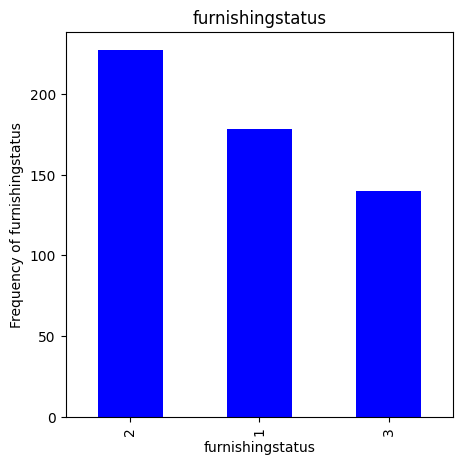

In [50]:
plt.figure(figsize= (5, 5))

plt_7 = df["furnishingstatus"].value_counts().plot(kind= "bar",color= "b")
plt.title("furnishingstatus")
plt_7.set(xlabel = "furnishingstatus", ylabel= "Frequency of furnishingstatus")

Text(0.5, 1.0, 'furnishingstatus')

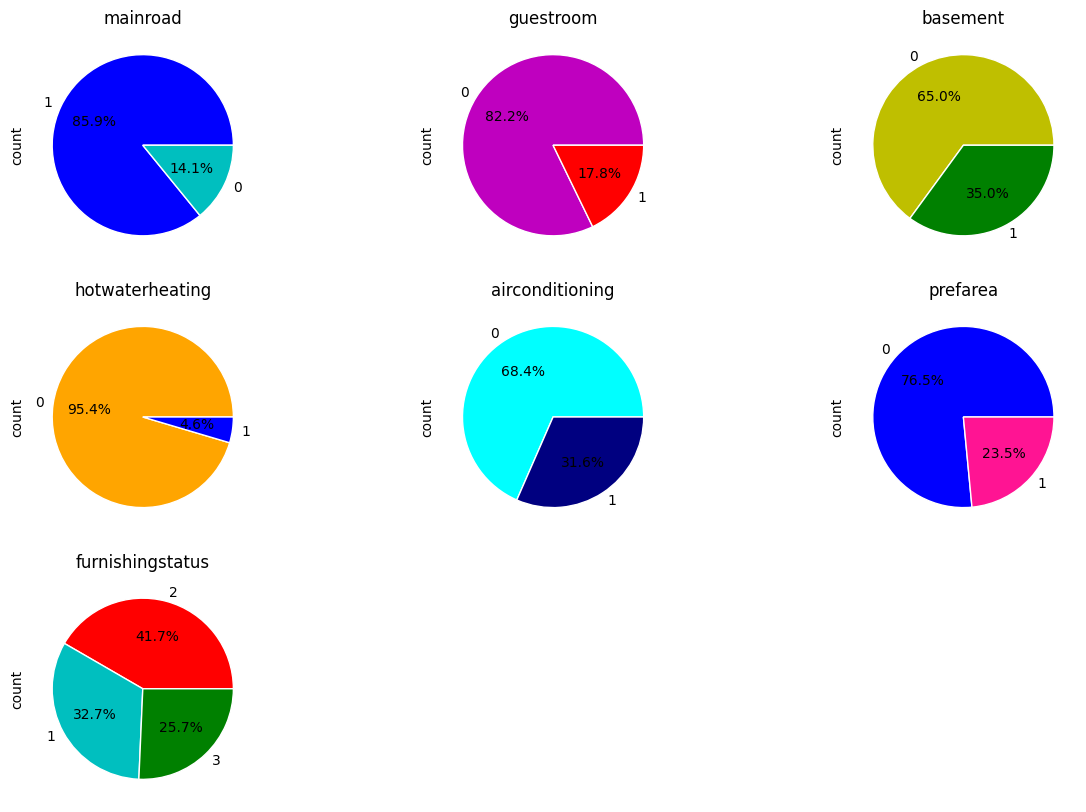

In [51]:
plt.figure(figsize= (15, 10))

plt.subplot(3, 3, 1)
plt_1 = df["mainroad"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["b", "c"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("mainroad")

plt.subplot(3, 3, 2)
plt_2 = df["guestroom"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["m", "r"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("guestroom")

plt.subplot(3, 3, 3)
plt_3 = df["basement"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["y", "g"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("basement")

plt.subplot(3, 3, 4)
plt_4 = df["hotwaterheating"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["orange", "b"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("hotwaterheating")

plt.subplot(3, 3, 5)
plt_5 = df["airconditioning"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["cyan", "navy"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("airconditioning")

plt.subplot(3, 3, 6)
plt_6 = df["prefarea"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["b", "deeppink"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("prefarea")

plt.subplot(3, 3, 7)
plt_7 = df["furnishingstatus"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["r", "c", "g"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("furnishingstatus")

C:\Users\Hediye\AppData\Local\Temp\ipykernel_11144\1319260784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= "mainroad", palette= "dark")
C:\Users\Hediye\AppData\Local\Temp\ipykernel_11144\1319260784.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= "guestroom", palette= "bright")
C:\Users\Hediye\AppData\Local\Temp\ipykernel_11144\1319260784.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= "basement", palette= "husl")
C:\Users\Hediye\AppData\Local\Temp\ipykernel_11144\1319260784.py:16: 

Text(0.5, 1.0, 'furnishingstatus')

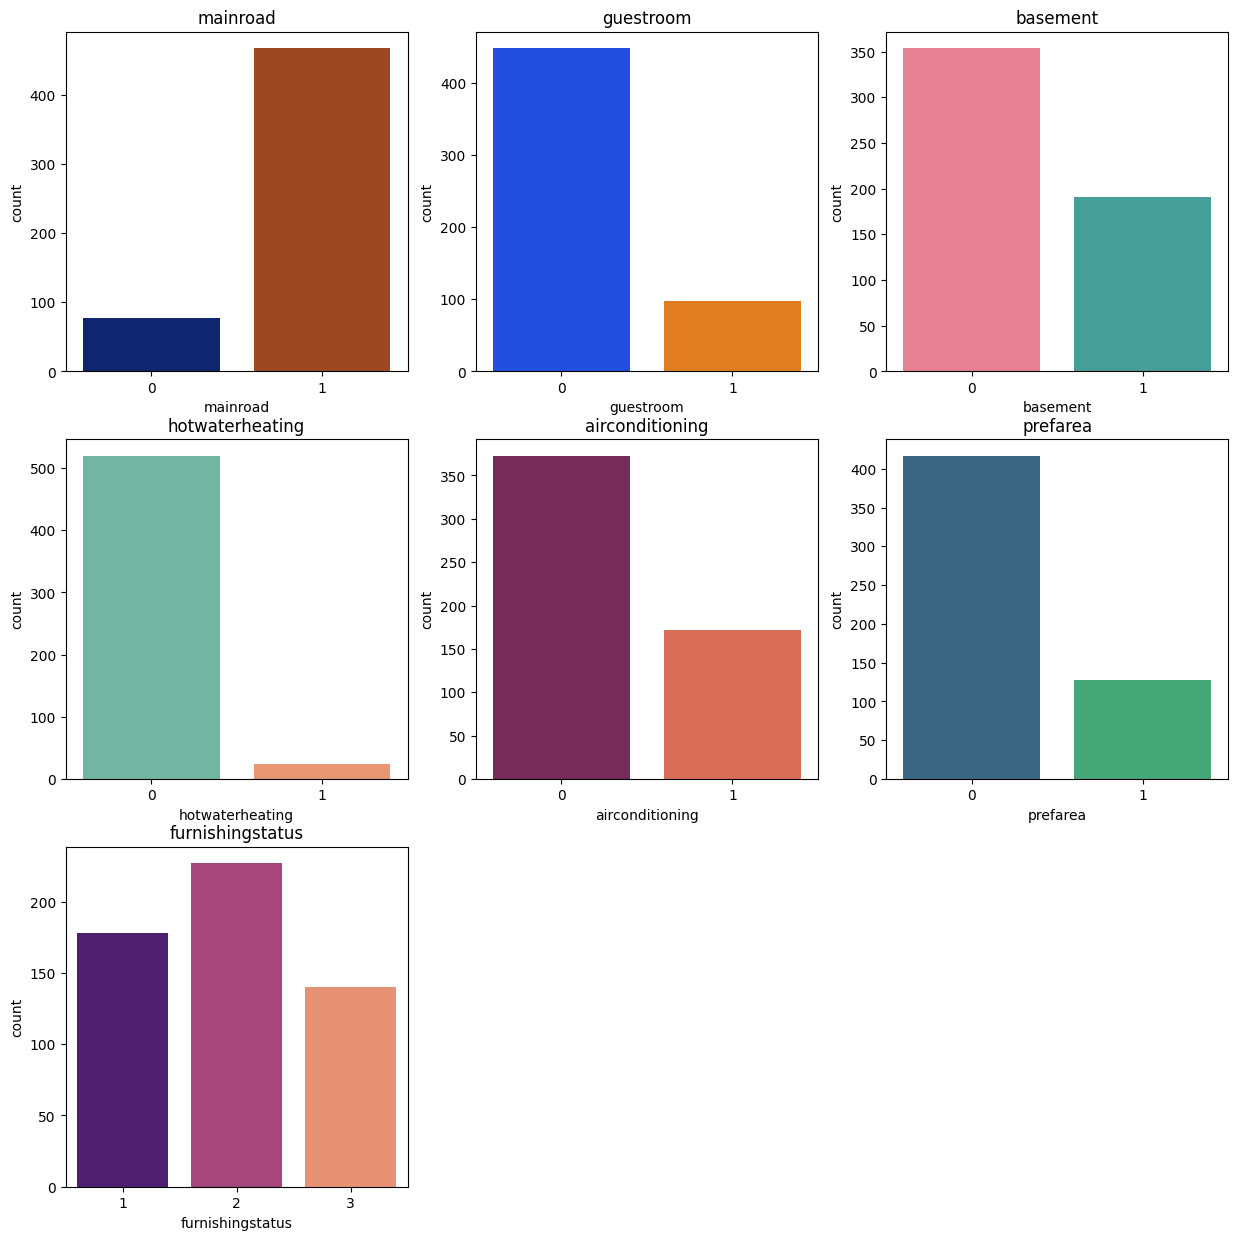

In [52]:
plt.figure(figsize= (15, 15))

plt.subplot(3, 3, 1)
sns.countplot(data= df, x= "mainroad", palette= "dark")
plt.title("mainroad")

plt.subplot(3, 3, 2)
sns.countplot(data= df, x= "guestroom", palette= "bright")
plt.title("guestroom")

plt.subplot(3, 3, 3)
sns.countplot(data= df, x= "basement", palette= "husl")
plt.title("basement")

plt.subplot(3, 3, 4)
sns.countplot(data= df, x= "hotwaterheating", palette= "Set2")
plt.title("hotwaterheating")

plt.subplot(3, 3, 5)
sns.countplot(data= df, x= "airconditioning", palette= "rocket")
plt.title("airconditioning")

plt.subplot(3, 3, 6)
sns.countplot(data= df, x= "prefarea", palette= "viridis")
plt.title("prefarea")

plt.subplot(3, 3, 7)
sns.countplot(data= df, x= "furnishingstatus", palette= "magma")
plt.title("furnishingstatus")

C:\Users\Hediye\AppData\Local\Temp\ipykernel_11144\3739262883.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data= df, y= "area", palette= "rocket")


<Axes: ylabel='area'>

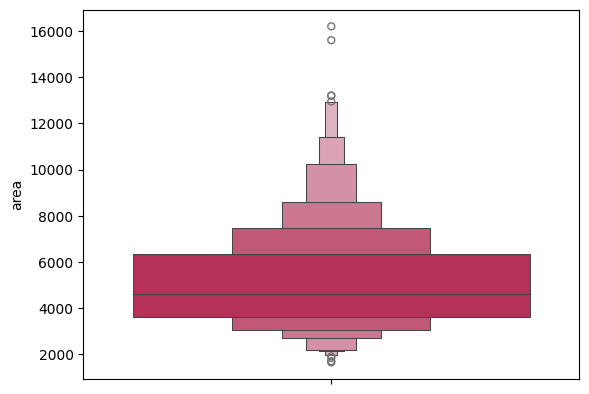

In [53]:
sns.boxenplot(data= df, y= "area", palette= "rocket")

Text(0, 0.5, 'Price')

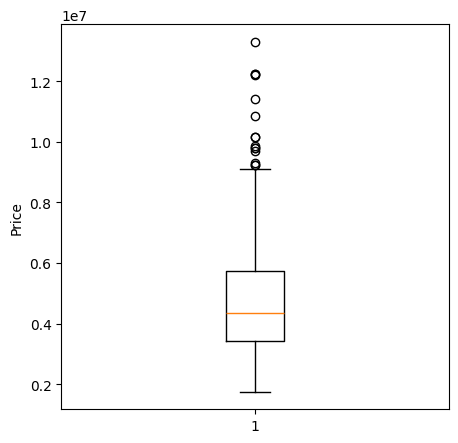

In [54]:
plt.figure(figsize= (5, 5))

plt.boxplot(x= df["price"])
plt.ylabel("Price")

Text(0.5, 1.0, 'parking')

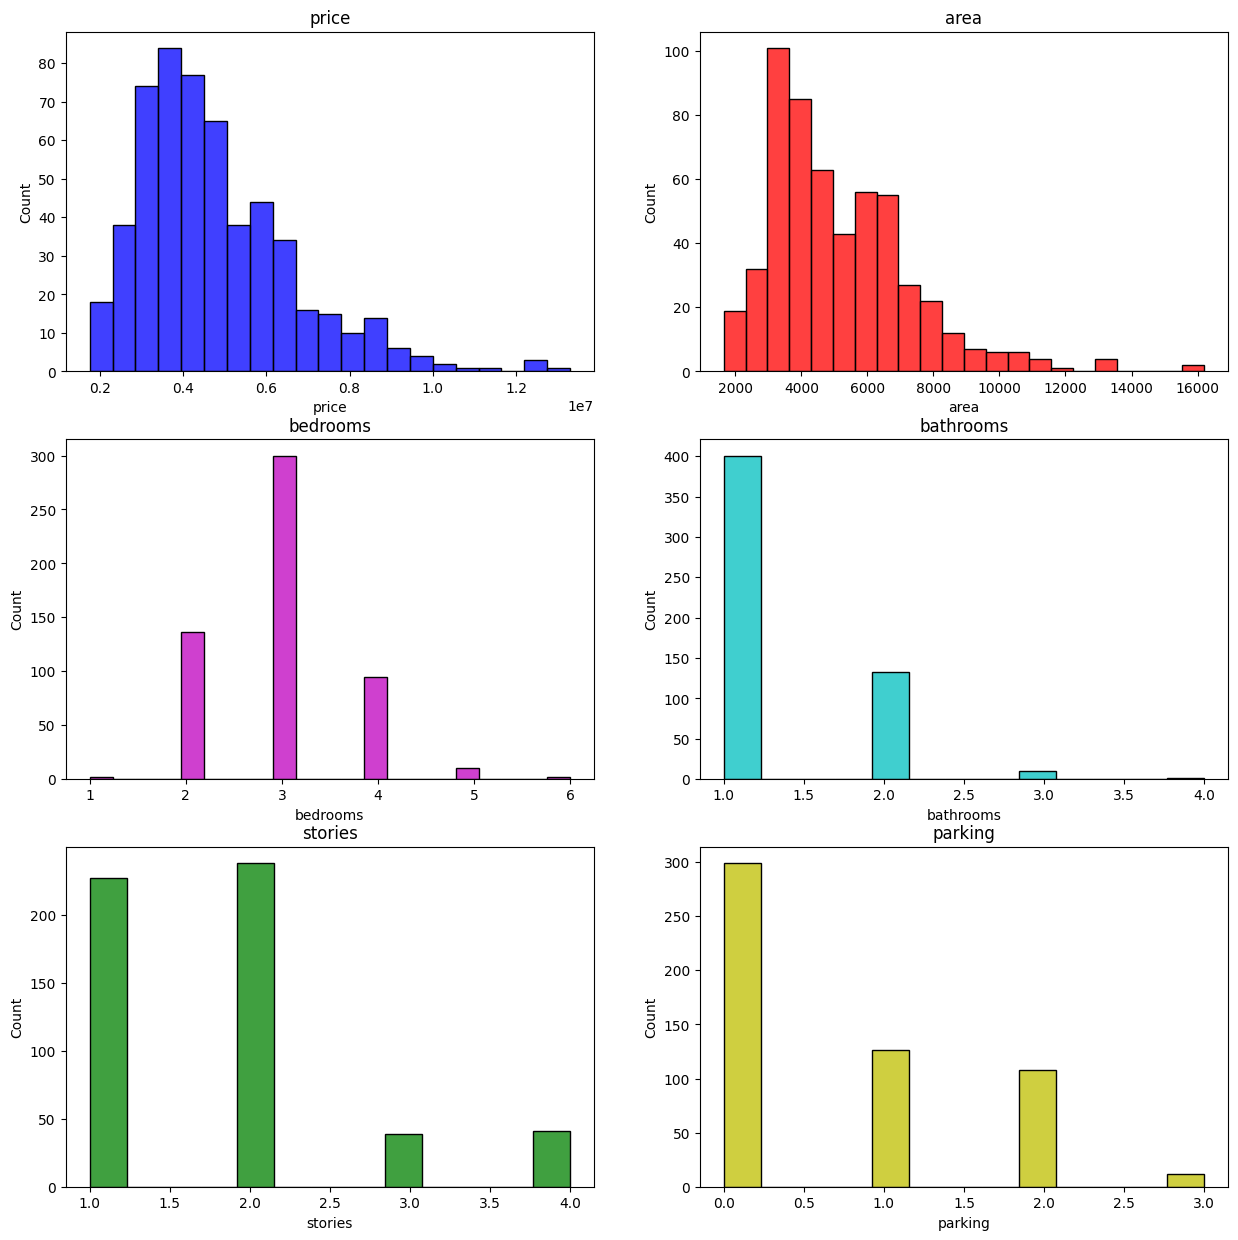

In [55]:
plt.figure(figsize= (15, 15))

plt.subplot(3, 2, 1)
sns.histplot(data= df, x= "price", color= "b")
plt.title("price")

plt.subplot(3, 2, 2)
sns.histplot(data= df, x= "area", color= "r")
plt.title("area")

plt.subplot(3, 2, 3)
sns.histplot(data= df, x= "bedrooms", color= "m")
plt.title("bedrooms")

plt.subplot(3, 2, 4)
sns.histplot(data= df, x= "bathrooms", color= "c")
plt.title("bathrooms")

plt.subplot(3, 2, 5)
sns.histplot(data= df, x= "stories", color= "g")
plt.title("stories")

plt.subplot(3, 2, 6)
sns.histplot(data= df, x= "parking", color= "y")
plt.title("parking")

Text(0.5, 1.0, 'Price & Area')

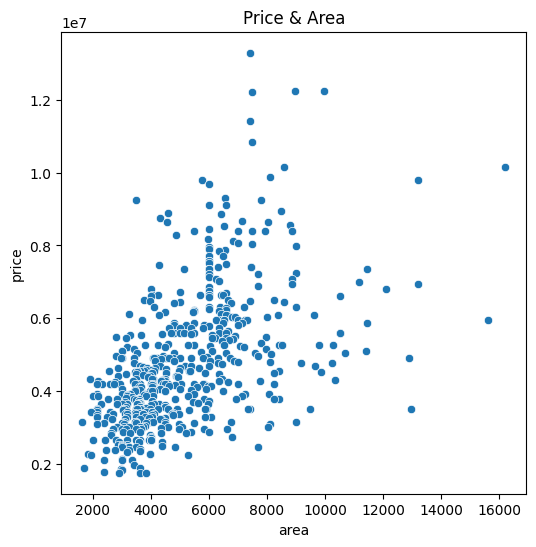

In [56]:
plt.figure(figsize= (6, 6))

sns.scatterplot(data= df, x= "area", y= "price")
plt.title("Price & Area")

Text(0.5, 1.0, 'Price & Area')

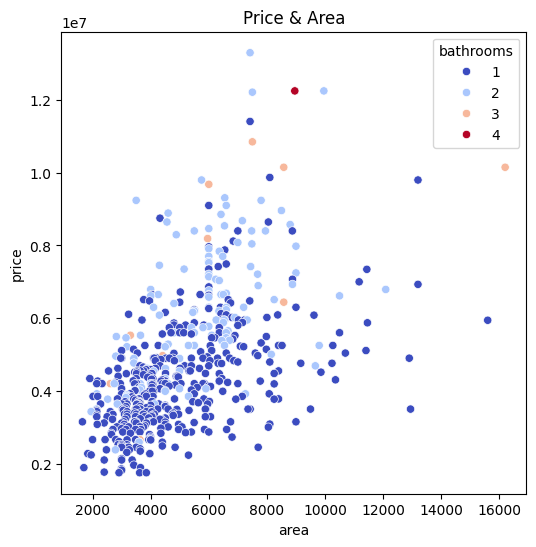

In [57]:
plt.figure(figsize= (6, 6))

sns.scatterplot(data= df, x= "area", y= "price", hue= "bathrooms", palette= "coolwarm")
plt.title("Price & Area")

Text(0.5, 1.0, 'Price & Area')

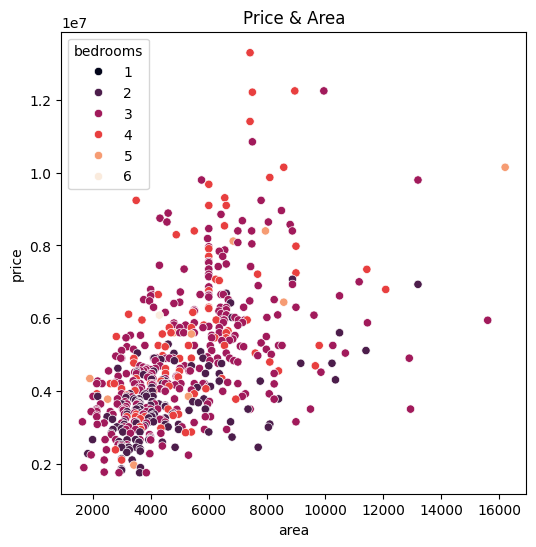

In [58]:
plt.figure(figsize= (6, 6))

sns.scatterplot(data= df, x= "area", y= "price", hue= "bedrooms", palette= "rocket")
plt.title("Price & Area")

Text(0.5, 1.0, 'Price & Area')

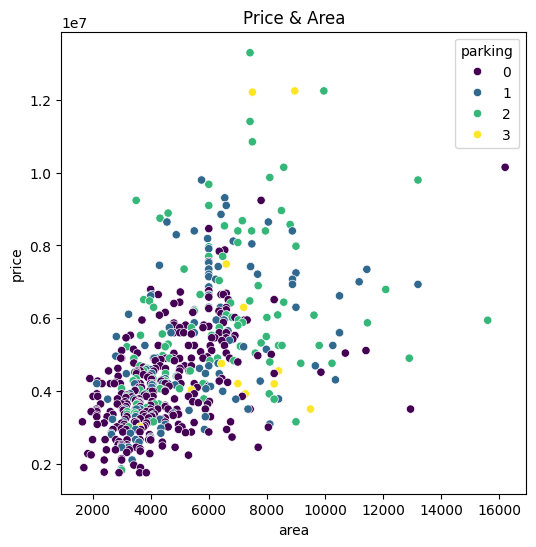

In [59]:
plt.figure(figsize= (6, 6))

sns.scatterplot(data= df, x= "area", y= "price", hue= "parking", palette= "viridis")
plt.title("Price & Area")

Text(0.5, 1.0, 'Price & Area')

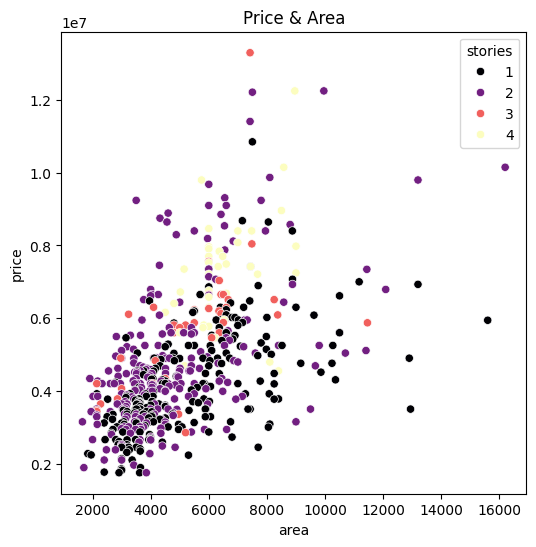

In [60]:
plt.figure(figsize= (6, 6))

sns.scatterplot(data= df, x= "area", y= "price", hue= "stories", palette= "magma")
plt.title("Price & Area")

Text(0.5, 1.0, 'Stories & Price')

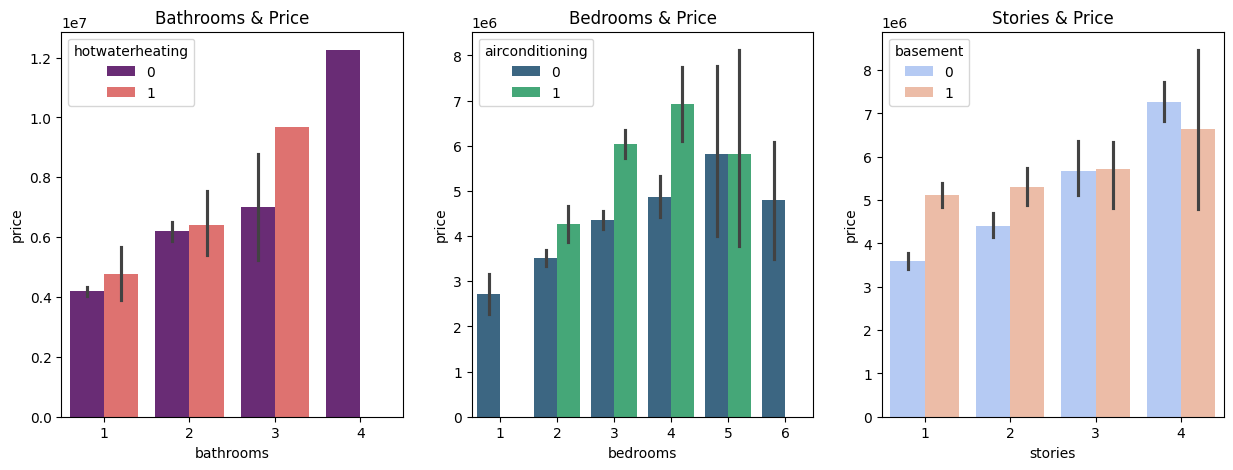

In [61]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data= df, x= "bathrooms", y= "price", hue= "hotwaterheating", palette= "magma")
plt.title("Bathrooms & Price")

plt.subplot(1, 3, 2)
sns.barplot(data= df, x= "bedrooms", y= "price", hue= "airconditioning", palette= "viridis")
plt.title("Bedrooms & Price")

plt.subplot(1, 3, 3)
sns.barplot(data= df, x= "stories", y= "price", hue= "basement", palette= "coolwarm")
plt.title("Stories & Price")

Text(0.5, 1.0, 'Bedrooms & Price')

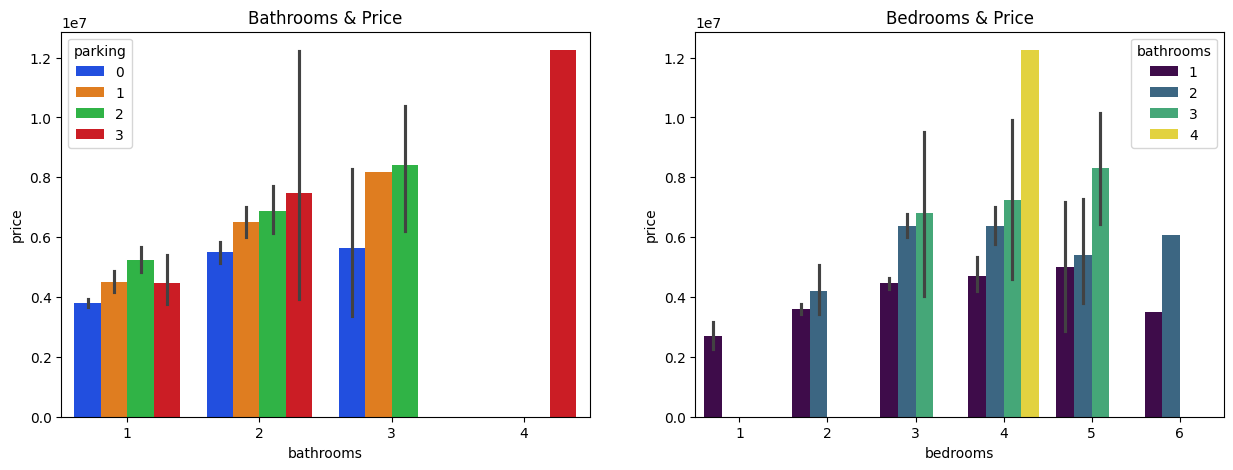

In [62]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data= df, x= "bathrooms", y= "price", hue= "parking", palette= "bright")
plt.title("Bathrooms & Price")

plt.subplot(1, 2, 2)
sns.barplot(data= df, x= "bedrooms", y= "price", hue= "bathrooms", palette= "viridis")
plt.title("Bedrooms & Price")

Text(0.5, 1.0, 'Price & basement')

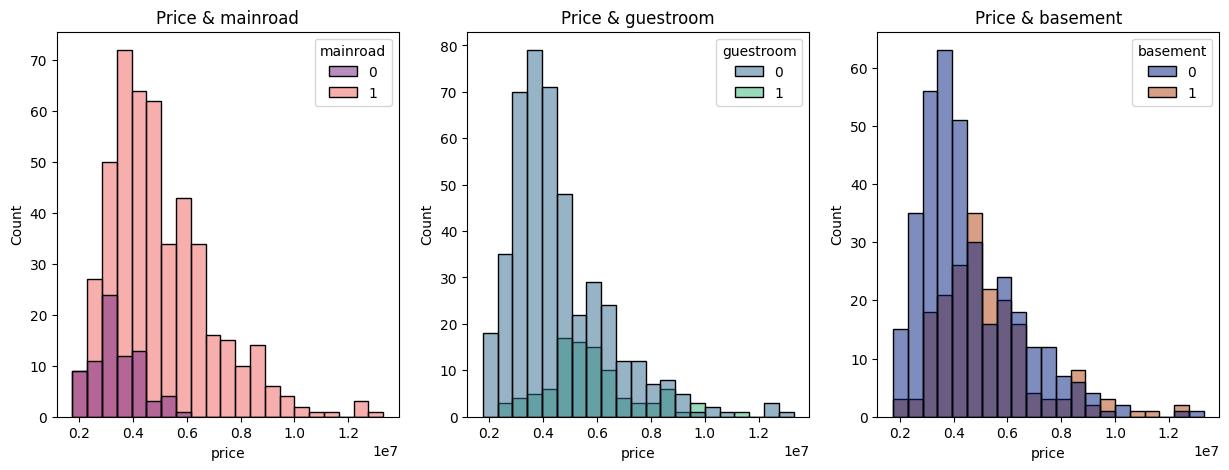

In [63]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data= df, x= "price", hue= "mainroad", palette= "magma")
plt.title("Price & mainroad")

plt.subplot(1, 3, 2)
sns.histplot(data= df, x= "price", hue= "guestroom", palette= "viridis")
plt.title("Price & guestroom")

plt.subplot(1, 3, 3)
sns.histplot(data= df, x= "price", hue= "basement", palette= "dark")
plt.title("Price & basement")


Text(0.5, 1.0, 'Price & basement')

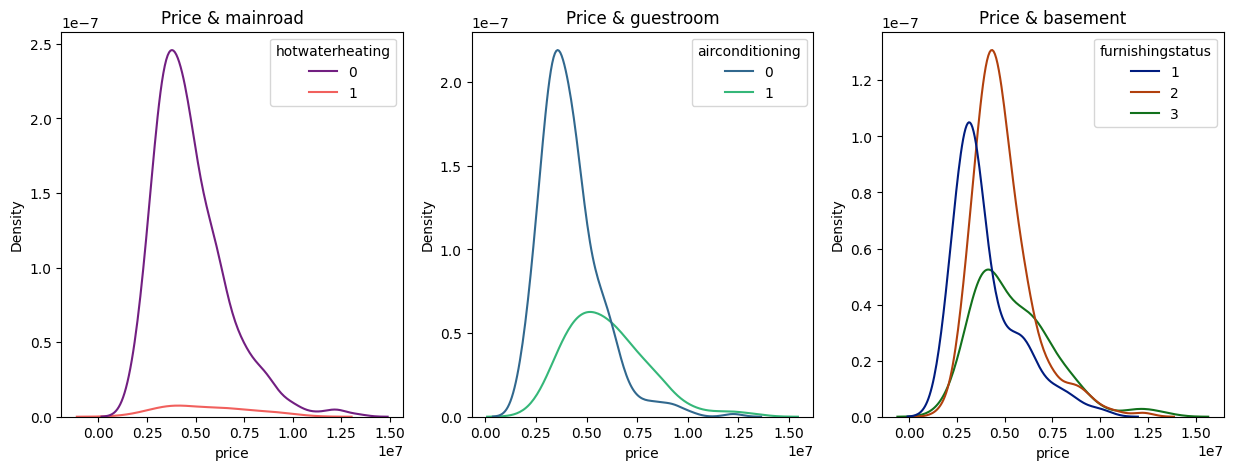

In [64]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(data= df, x= "price", hue= "hotwaterheating", palette= "magma")
plt.title("Price & mainroad")

plt.subplot(1, 3, 2)
sns.kdeplot(data= df, x= "price", hue= "airconditioning", palette= "viridis")
plt.title("Price & guestroom")

plt.subplot(1, 3, 3)
sns.kdeplot(data= df, x= "price", hue= "furnishingstatus", palette= "dark")
plt.title("Price & basement")


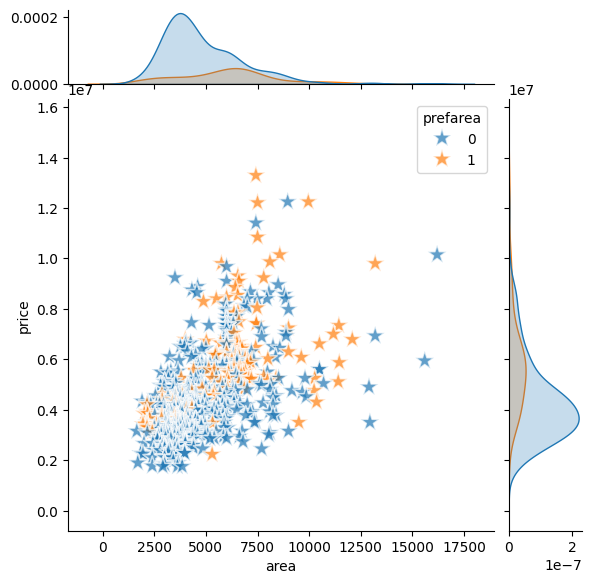

In [65]:
sns.jointplot(data= df, x= "area", y= "price", hue= "prefarea", marker= "*", s= 200, alpha= 0.7, marginal_ticks= True)

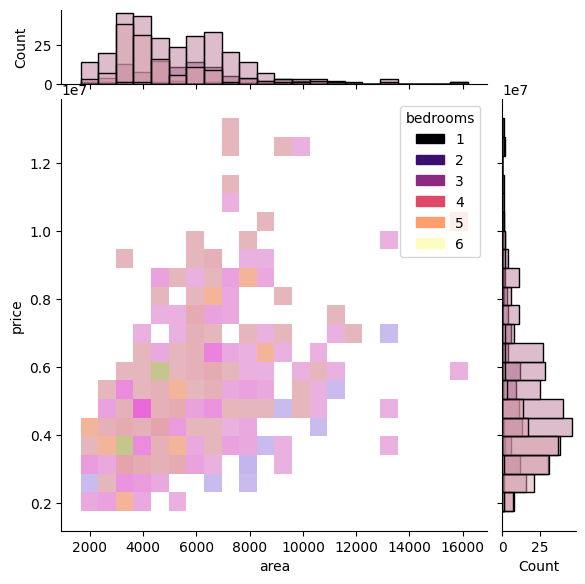

In [66]:
sns.jointplot(data= df, x= "area", y= "price", kind= "hist", hue= "bedrooms", palette= "magma", marginal_ticks= True)

<Axes: >

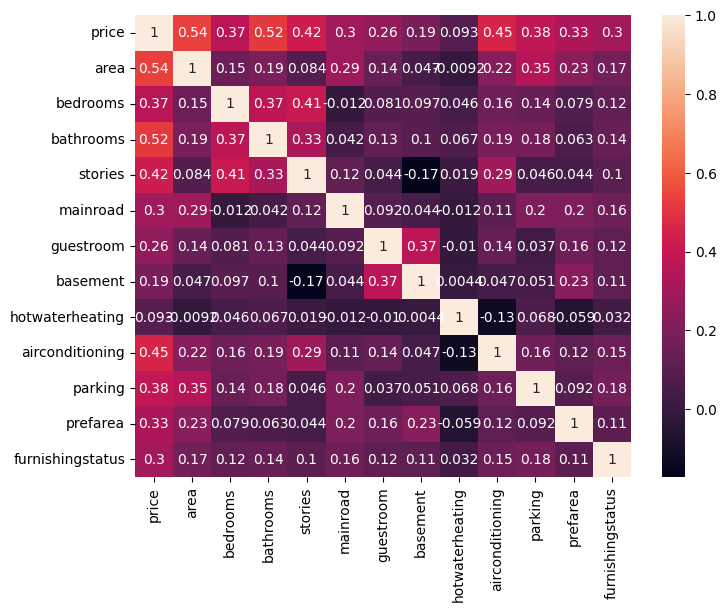

In [67]:
plt.figure(figsize= (8, 6))

sns.heatmap(df.corr(numeric_only= True), annot= True)

Text(0.5, 1.0, 'Correlation Heatmap')

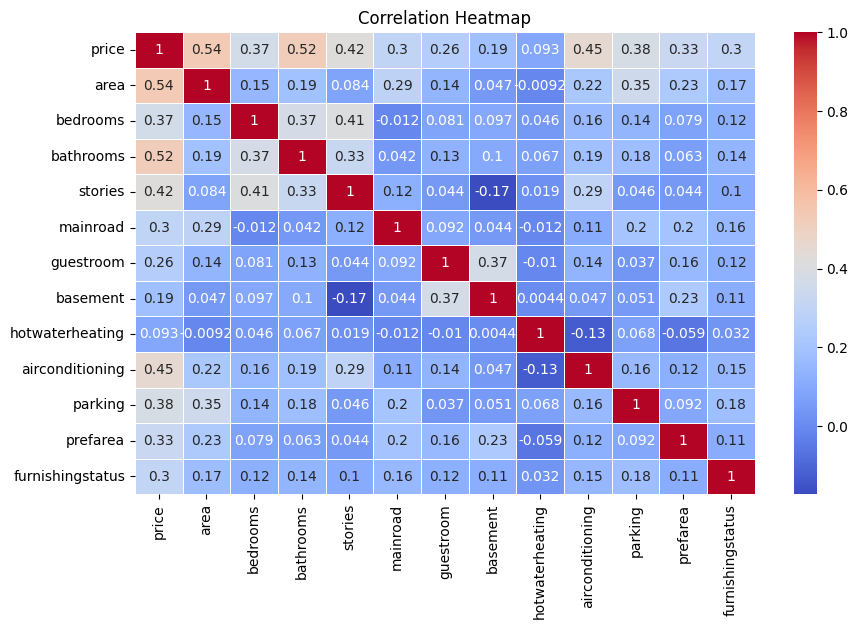

In [68]:
plt.figure(figsize=(10, 6))  

# cor_matrix= df[numerical_list].corr()
cor_matrix= df.corr()
sns.heatmap(cor_matrix, annot= True, cmap= "coolwarm", linewidths= 0.5)
plt.title("Correlation Heatmap")

# Modeling

**Split Data**

In [69]:
X = df.drop("price", axis= 1)
y = df["price"]

**Delete outliers**

In [70]:
outlier_detector = IsolationForest(contamination= 0.07)  

outlier_detector.fit(X)

outliers = outlier_detector.predict(X)

X_clean = X[outliers == 1]
y_clean = y[outliers == 1]

X = X_clean
y = y_clean

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.3, 
                                                    random_state= 100)

# df_train, df_test = train_test_split(df, 
#                                      train_size = 0.75, 
#                                      test_size = 0.25, 
#                                      random_state = 100)

In [72]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
500,2800,3,1,1,1,0,0,0,0,0,0,1
94,6000,4,2,4,1,0,0,0,0,1,0,2
515,3210,3,1,2,1,0,1,0,0,0,0,1
227,6000,2,1,1,1,0,1,0,1,1,0,3
103,6350,3,2,3,1,1,0,0,1,0,0,3


In [73]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
226,5170,3,1,4,1,0,0,0,1,0,0,2
257,8250,3,1,1,1,0,0,0,0,0,0,3
541,2400,3,1,1,0,0,0,0,0,0,0,2
45,6000,3,2,3,1,0,0,0,1,0,0,2
345,2015,3,1,2,1,0,1,0,0,0,1,2


**LinearRegression**

In [74]:
lr_model = LinearRegression()

In [75]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [76]:
lr_model.intercept_

-36988.91160634067

In [77]:
lr_model.coef_

array([1.86658393e+02, 1.45485745e+05, 8.31318100e+05, 4.12469540e+05,
       3.17509806e+05, 5.57137010e+05, 2.27417477e+05, 1.26945797e+06,
       9.53336745e+05, 2.08251271e+05, 6.63400562e+05, 2.54057318e+05])

In [78]:
df_coeff = pd.DataFrame(lr_model.coef_, X.columns, columns= ["Coefficient"])
df_coeff

,Coefficient
area,1.866584e+02
bedrooms,1.454857e+05
bathrooms,8.313181e+05
stories,4.124695e+05
mainroad,3.175098e+05
guestroom,5.571370e+05
basement,2.274175e+05
hotwaterheating,1.269458e+06
airconditioning,9.533367e+05
parking,2.082513e+05


In [79]:
lr_prediction = lr_model.predict(X_test)
lr_prediction

array([5624649.66253112, 4262869.46590821, 2599350.74393062,
       6198424.68895123, 4148284.64850523, 6156555.42551142,
       5496756.89552622, 5080822.63169717, 6293222.9924092 ,
       3467928.43458559, 4806911.96863766, 3369898.63596284,
       6219545.77187897, 6005994.14751772, 3938645.22651538,
       2748773.89340878, 5415875.23111325, 4992929.01995709,
       5103565.2706495 , 3451210.05384212, 4859140.49218588,
       2823437.25048597, 5180448.19596441, 3579887.7957595 ,
       3295839.38029005, 3557606.11858906, 3950798.68032121,
       3448589.55705747, 2295003.46041506, 3333418.47120462,
       6000192.60434892, 3843701.12548991, 4310359.62517266,
       4851945.14970708, 5732884.67077822, 7792111.88110346,
       3400271.64487433, 3194439.74683145, 3617181.06981988,
       7775825.57425157, 5832004.07318968, 3273232.54223562,
       3215513.97856723, 3095044.57450024, 5783094.34352018,
       3035515.91584416, 4632428.0521224 , 4992800.84276877,
       4327262.94506668,

Text(0.5, 1.0, 'Linear Regression model - predictions')

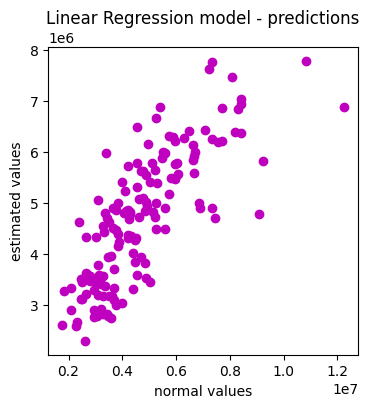

In [80]:
plt.figure(figsize= (4, 4))

plt.scatter(y_test, lr_prediction, color= "m")
plt.xlabel("normal values")
plt.ylabel("estimated values")
plt.title("Linear Regression model - predictions")

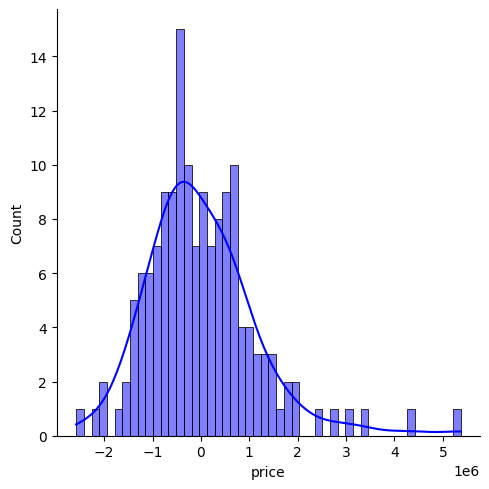

In [81]:
sns.displot((y_test - lr_prediction), kde= True, bins= 50, color= "b")

In [82]:
parameters_lr = {"fit_intercept":[True, False],
                 "n_jobs":[None, -1]}

In [83]:
lr_CV = GridSearchCV(lr_model, parameters_lr, cv= 5, scoring= "r2")

In [84]:
lr_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [None, -1]},
             scoring='r2')

In [85]:
lr_CV_predict = lr_CV.predict(X_test)
lr_CV_predict

array([5625096.5510997 , 4255086.44225685, 2608019.37870399,
       6194885.91488701, 4150958.82086823, 6145545.82176871,
       5489823.95248281, 5079228.43245508, 6293512.63772519,
       3468351.3267121 , 4807291.27878305, 3377428.23439274,
       6210178.59883142, 6011100.66339828, 3939386.29105637,
       2756960.51994369, 5421376.83961784, 4976385.14223865,
       5112634.88020605, 3465595.99078092, 4855291.20105774,
       2831214.93936158, 5181215.16030748, 3582593.80575341,
       3301700.79190062, 3562088.66868316, 3947806.21638621,
       3450262.75692742, 2311574.10542574, 3335519.46081889,
       5995314.8782369 , 3844206.49747843, 4314529.21769602,
       4856674.12125493, 5732220.82192596, 7788039.40297606,
       3405224.67668174, 3202930.3487607 , 3628519.54908352,
       7766584.2081221 , 5825757.70856643, 3284391.08312524,
       3214909.15545584, 3098979.2930932 , 5779197.64071389,
       3039412.51746204, 4621210.25518158, 4999350.45969404,
       4332031.76873721,

In [86]:
print("Best parameter combine: ", lr_CV.best_params_)
print("Best score: ", lr_CV.best_score_)

Best parameter combine:  {'fit_intercept': False, 'n_jobs': None}
Best score:  0.6316234358912844


In [87]:
print("MAE:", metrics.mean_absolute_error(y_test, lr_prediction))
print("MSE:", metrics.mean_squared_error(y_test, lr_prediction))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, lr_prediction)))

MAE: 847703.3726494794
MSE: 1319704535010.8462
RMSE: 1148783.937479475


In [88]:
print("tuned hpyerparameters :(best parameters) ", lr_CV.best_params_)
print(f"accuracy : {lr_CV.best_score_}")

tuned hpyerparameters :(best parameters)  {'fit_intercept': False, 'n_jobs': None}
accuracy : 0.6316234358912844


In [89]:
accu = []
methods = []
accu.append(lr_CV.score(X_test, y_test))
methods.append("LinearRegression")

In [90]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, lr_prediction)}")

mean_absolute_percentage_error : 0.19136103958248685


In [91]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, lr_CV_predict)}")

mean_absolute_percentage_error : 0.19152656522518594


**LogisticRegression**

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.25, 
                                                    random_state= 100)

In [93]:
log_reg_model = LogisticRegression()

In [94]:
log_reg_model.fit(X_train, y_train)

C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
log_reg_prediction = log_reg_model.predict(X_test)
log_reg_prediction

array([4900000, 4270000, 4200000, 5600000, 4200000, 4200000, 3500000,
       3920000, 4900000, 3500000, 3500000, 4200000, 3500000, 5600000,
       3500000, 3500000, 4900000, 3500000, 6300000, 4900000, 4200000,
       3500000, 4900000, 4200000, 4900000, 4200000, 4200000, 3500000,
       3500000, 3150000, 3920000, 3500000, 4900000, 3500000, 3500000,
       5250000, 4200000, 4200000, 3500000, 4900000, 5600000, 3920000,
       3500000, 3500000, 4270000, 3500000, 4200000, 4900000, 3500000,
       4900000, 5600000, 3500000, 3150000, 4200000, 4200000, 3500000,
       3920000, 3500000, 5250000, 5250000, 3500000, 3500000, 5950000,
       4900000, 3500000, 3920000, 4900000, 4900000, 5250000, 5250000,
       4900000, 4900000, 4200000, 3500000, 5250000, 4200000, 4900000,
       4200000, 4200000, 5950000, 5250000, 3500000, 6650000, 3150000,
       4900000, 6300000, 5250000, 3500000, 3150000, 3150000, 3500000,
       4900000, 5250000, 4900000, 3500000, 4200000, 3500000, 5600000,
       3500000, 5250

In [96]:
y_test

226    4690000
257    4480000
541    1767150
45     7560000
345    3850000
        ...   
520    2450000
351    3780000
124    5950000
167    5285000
177    5243000
Name: price, Length: 127, dtype: int64

In [97]:
parameters_log = {"C": [0.01,0.1,1],
                  "penalty": ["l2"], 
                  "solver": ["lbfgs"]}

In [98]:
log_reg_CV = GridSearchCV(log_reg_model, parameters_log, cv= 10)

In [99]:
log_reg_CV.fit(X_train, y_train)

C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [100]:
log_reg_CV.score(X_test, y_test)

0.031496062992125984

In [101]:
log_reg_CV_prediction = log_reg_CV.predict(X_test)
log_reg_CV_prediction

array([4200000, 3500000, 4200000, 3500000, 4200000, 4200000, 3500000,
       4200000, 4200000, 3500000, 3500000, 4200000, 4200000, 3500000,
       3500000, 3500000, 4200000, 3500000, 3500000, 3500000, 4200000,
       3500000, 3500000, 4200000, 4200000, 4200000, 4200000, 3500000,
       3500000, 3500000, 3500000, 4200000, 4200000, 4200000, 4200000,
       3500000, 4200000, 4200000, 3500000, 4200000, 3500000, 4200000,
       3500000, 3500000, 3500000, 3500000, 4200000, 4200000, 3500000,
       4200000, 3500000, 3500000, 3500000, 4200000, 4200000, 3500000,
       3500000, 3500000, 3500000, 3500000, 3500000, 3500000, 3500000,
       4200000, 3500000, 4200000, 4200000, 4200000, 3500000, 3500000,
       4200000, 4200000, 4200000, 3500000, 3500000, 4200000, 4200000,
       4200000, 4200000, 3500000, 3500000, 4200000, 3500000, 3500000,
       4200000, 3500000, 3500000, 3500000, 3500000, 3500000, 3500000,
       3500000, 3500000, 4200000, 3500000, 4200000, 3500000, 3500000,
       3500000, 3500

In [102]:
print("tuned hpyerparameters :(best parameters) ", log_reg_CV.best_params_)
print(f"accuracy : {log_reg_CV.best_score_}")

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.044950213371266


In [103]:
accu.append(log_reg_CV.score(X_test, y_test))
methods.append("LogisticRegression")

In [104]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, log_reg_prediction)}")

mean_absolute_percentage_error : 0.27815673496043863


In [105]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, log_reg_CV_prediction)}")

mean_absolute_percentage_error : 0.2997697942265117


**DecisionTreeClassifier**

In [106]:
DT = DecisionTreeClassifier()

In [107]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [108]:
DT_predict = DT.predict(X_test)
DT_predict

array([6160000, 4515000, 3353000, 6510000, 3290000, 3640000, 3920000,
       6790000, 4620000, 4200000, 7700000, 3640000, 6300000, 5565000,
       4830000, 2345000, 4613000, 5250000, 4473000, 3150000, 4200000,
       3325000, 5810000, 4235000, 3010000, 3430000, 3150000, 3220000,
       2135000, 3710000, 6650000, 4165000, 3150000, 3710000, 5600000,
       7420000, 3010000, 3640000, 2310000, 7210000, 5320000, 2450000,
       3500000, 3633000, 6300000, 4007500, 3885000, 2450000, 2730000,
       3990000, 3920000, 5250000, 3710000, 3010000, 3010000, 3430000,
       3640000, 4760000, 3003000, 5460000, 3360000, 4007500, 5880000,
       2520000, 2870000, 4690000, 5110000, 4907000, 7070000, 5950000,
       4900000, 6195000, 3500000, 8680000, 5873000, 4690000, 6195000,
       3290000, 2940000, 5460000, 6650000, 2450000, 8960000, 4305000,
       3220000, 7420000, 7140000, 4760000, 4305000, 4305000, 4200000,
       4900000, 5250000, 6790000, 4340000, 5530000, 5775000, 5950000,
       3325000, 2940

In [109]:
parameters_DT = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "max_depth": [2 * n for n in range(1, 10)],
                 "max_features": ["auto", "sqrt"],
                 "min_samples_leaf": [1, 2, 4],
                 "min_samples_split": [2, 5, 10]}

In [110]:
DT_CV = GridSearchCV(DT, parameters_DT, cv= 10)

In [111]:
DT_CV.fit(X_train, y_train)

C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [112]:
DT_CV.score(X_test, y_test)

0.03937007874015748

In [113]:
DT_CV_predict = DT_CV.predict(X_test)
DT_CV_predict

array([3500000, 3500000, 2940000, 3500000, 5950000, 4900000, 3500000,
       4900000, 3500000, 4900000, 3500000, 4900000, 3500000, 3500000,
       3500000, 3500000, 4900000, 3500000, 3500000, 4900000, 2940000,
       3500000, 3500000, 3500000, 3500000, 4900000, 4900000, 3500000,
       2940000, 3500000, 5950000, 3500000, 3500000, 3500000, 3500000,
       5950000, 2940000, 4900000, 3500000, 3500000, 3500000, 4900000,
       3500000, 3500000, 3500000, 4900000, 3500000, 5950000, 3500000,
       3500000, 3500000, 3500000, 3500000, 5950000, 2940000, 3500000,
       3500000, 3500000, 3500000, 5950000, 3500000, 2940000, 5950000,
       3500000, 3500000, 3500000, 4900000, 3500000, 3500000, 5950000,
       4900000, 5950000, 3500000, 4900000, 5950000, 3500000, 3500000,
       3500000, 2940000, 5950000, 5950000, 4900000, 3500000, 3500000,
       2940000, 3500000, 3500000, 3500000, 3500000, 3500000, 3500000,
       4900000, 5950000, 4900000, 4900000, 3500000, 3500000, 5950000,
       3500000, 3500

In [114]:
print("tuned hpyerparameters :(best parameters) ", DT_CV.best_params_)
print(f"accuracy : {DT_CV.best_score_}")

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.058036984352773824


In [115]:
accu.append(DT_CV.score(X_test, y_test))
methods.append("Decision Tree Classifier")

In [116]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, DT_predict)}")

mean_absolute_percentage_error : 0.21385160668284184


In [117]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, DT_CV_predict)}")

mean_absolute_percentage_error : 0.28859269480408106


**RandomForestClassifier**

In [118]:
rfc_model = RandomForestClassifier()

In [119]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
rfc_prediction = rfc_model.predict(X_test)
rfc_prediction

array([5810000, 4270000, 2660000, 6580000, 3430000, 3570000, 3920000,
       5530000, 4620000, 4130000, 3640000, 3640000, 6300000, 6160000,
       4550000, 2345000, 4007500, 5600000, 3640000, 4445000, 4200000,
       3430000, 5810000, 4550000, 2660000, 5110000, 4655000, 3220000,
       2135000, 3395000, 5950000, 4165000, 2520000, 4095000, 7350000,
       5950000, 3010000, 3640000, 2310000, 7560000, 5600000, 3430000,
       4060000, 3360000, 4690000, 2520000, 3885000, 3990000, 3143000,
       3990000, 2940000, 3885000, 3850000, 4515000, 3010000, 3150000,
       3640000, 4200000, 3003000, 5425000, 2660000, 4200000, 5950000,
       2520000, 2870000, 6475000, 8645000, 6440000, 3500000, 6020000,
       8645000, 5460000, 3500000, 7455000, 5950000, 4690000, 6195000,
       5600000, 2940000, 5950000, 7875000, 7455000, 8960000, 3703000,
       3360000, 4795000, 4690000, 6440000, 4095000, 3850000, 3220000,
       4900000, 5803000, 6930000, 5740000, 5530000, 5775000, 3290000,
       3430000, 2940

In [121]:
parameters_rfc = {"max_depth": [3, 5, 10, None],
                  "max_features": [1, 3, 5, 7],
                  "min_samples_leaf": [1, 2, 3, 5],
                  "min_samples_split": [1, 2, 3, 5],
                  "n_estimators": [10, 100, 200]}

In [122]:
rfc_CV = GridSearchCV(rfc_model, parameters_rfc, cv= 3, scoring= "accuracy")

In [123]:
rfc_CV.fit(X_train, y_train)

C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
576 fits failed out of a total of 2304.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\He

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [1, 2, 3, 5],
                         'n_estimators': [10, 100, 200]},
             scoring='accuracy')

In [124]:
rfc_CV.score(X_test, y_test)

0.031496062992125984

In [125]:
rfc_CV_prediction = rfc_CV.predict(X_test)
rfc_CV_prediction

array([4900000, 3500000, 3500000, 4200000, 3500000, 4200000, 4900000,
       4200000, 4900000, 4200000, 3500000, 4200000, 6300000, 7420000,
       4200000, 3500000, 4200000, 4200000, 3500000, 4900000, 4200000,
       3500000, 4200000, 3500000, 3500000, 3500000, 4200000, 3500000,
       3500000, 3500000, 5950000, 3500000, 3500000, 4200000, 4200000,
       5950000, 4200000, 3150000, 3500000, 6195000, 4200000, 3500000,
       3500000, 3500000, 3500000, 4200000, 3500000, 4900000, 3500000,
       3500000, 4900000, 4200000, 3500000, 4200000, 4200000, 3500000,
       3500000, 3500000, 3500000, 4900000, 3500000, 3500000, 6020000,
       3500000, 3500000, 3500000, 4900000, 3500000, 3500000, 5250000,
       4900000, 4900000, 3500000, 4900000, 3500000, 3500000, 6195000,
       4900000, 2940000, 5950000, 4200000, 3500000, 7700000, 3500000,
       3500000, 4550000, 4200000, 3500000, 4200000, 3500000, 3500000,
       4900000, 5950000, 4900000, 4200000, 4200000, 7420000, 5950000,
       3500000, 3500

In [126]:
print("tuned hpyerparameters :(best parameters) ", rfc_CV.best_params_)
print(f"accuracy : {rfc_CV.best_score_}")

tuned hpyerparameters :(best parameters)  {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
accuracy : 0.05543057117860267


In [127]:
accu.append(rfc_CV.score(X_test, y_test))
methods.append("Decision Tree Classifier")

In [128]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, rfc_prediction)}")

mean_absolute_percentage_error : 0.23904595457613836


In [129]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, rfc_CV_prediction)}")

mean_absolute_percentage_error : 0.21718953888434916


**KNeighborsClassifier (KNN)**

In [130]:
knn_model = KNeighborsClassifier(n_neighbors= 1)

In [131]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [132]:
knn_prediction = knn_model.predict(X_test)
knn_prediction

array([ 7350000,  3773000,  2100000,  6580000,  2660000,  4200000,
        3780000,  4375000,  6195000,  5250000,  4893000,  3010000,
        6300000,  4620000,  4060000,  2345000,  4007500,  5250000,
        4340000,  3640000,  3430000,  3710000,  6440000,  2100000,
        2520000,  2835000,  3815000,  2590000,  1750000,  3990000,
        5110000,  4095000,  4200000,  4767000,  8890000,  8400000,
        3500000,  3290000,  3430000,  7560000,  5320000,  2450000,
        3430000,  2590000,  5873000,  4543000,  4235000,  3290000,
        2730000,  3990000,  5652500,  3500000,  4690000,  5145000,
        3920000,  3836000,  3570000,  7350000,  9870000,  8855000,
        3290000,  8750000,  5950000,  2520000,  2870000,  6510000,
        3815000,  5250000,  5600000, 11410000,  3325000,  4893000,
        3115000,  3640000,  5873000,  4690000,  7525000,  4095000,
        2940000,  9100000,  8855000,  3234000,  4200000,  3500000,
        2380000,  4795000,  4515000,  3640000,  3143000,  3570

In [133]:
error_rate = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    Predict_i = knn.predict(X_test)
    error_rate.append(np.mean(Predict_i != y_test))

Text(0, 0.5, 'Error rate')

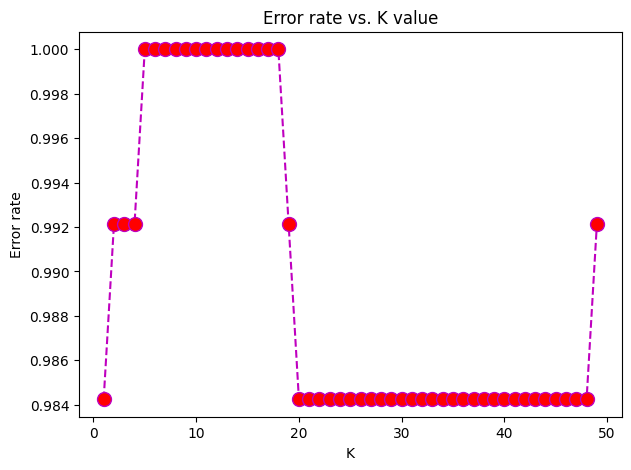

In [134]:
plt.figure(figsize= (7, 5))
plt.plot(range(1, 50), error_rate, color= "m", linestyle= "dashed", marker= "o", markerfacecolor= "r", markersize= 10)
plt.title("Error rate vs. K value")
plt.xlabel("K")
plt.ylabel("Error rate")

In [135]:
knn_1 = KNeighborsClassifier(n_neighbors = 1)

knn_1.fit(X_train, y_train)
knn_1_prediction = knn_1.predict(X_test)

In [136]:
knn_20 = KNeighborsClassifier(n_neighbors = 20)

knn_20.fit(X_train, y_train)
knn_20_prediction = knn_20.predict(X_test)

In [137]:
knn_33 = KNeighborsClassifier(n_neighbors = 33)

knn_33.fit(X_train, y_train)
knn_33_prediction = knn_33.predict(X_test)

In [138]:
knn_48 = KNeighborsClassifier(n_neighbors = 48)

knn_48.fit(X_train, y_train)
knn_48_prediction = knn_48.predict(X_test)

In [139]:
parameters_knn = {"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                  "p": [1, 2]}

In [140]:
knn = KNeighborsClassifier()

In [141]:
knn_CV = GridSearchCV(knn, parameters_knn, cv= 10)

In [142]:
knn_CV.fit(X_train, y_train)

C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [143]:
knn_CV.score(X_test, y_test)

0.0

In [144]:
knn_CV_predict = knn_CV.predict(X_test)
knn_CV_predict

array([2852500, 3773000, 2100000, 5775000, 2660000, 2590000, 2940000,
       1750000, 4200000, 3920000, 4620000, 3010000, 6300000, 4200000,
       4060000, 2345000, 3143000, 4550000, 4340000, 3633000, 2835000,
       3325000, 4620000, 2100000, 2100000, 2835000, 2940000, 2590000,
       1750000, 3325000, 3290000, 3325000, 3633000, 1960000, 3500000,
       7420000, 2940000, 3290000, 2310000, 6300000, 4270000, 2100000,
       2695000, 2590000, 5040000, 3150000, 2660000, 3290000, 2695000,
       2275000, 2940000, 3500000, 2870000, 1960000, 2100000, 2835000,
       3570000, 4690000, 3003000, 5740000, 3290000, 4060000, 3850000,
       2100000, 2408000, 3010000, 2940000, 3640000, 4305000, 3500000,
       3325000, 4620000, 2450000, 3640000, 5040000, 2870000, 6650000,
       2940000, 2660000, 5460000, 4340000, 2345000, 4200000, 3500000,
       2100000, 4200000, 3500000, 3500000, 3143000, 3143000, 3360000,
       3360000, 4515000, 2730000, 4690000, 2310000, 2940000, 5460000,
       3325000, 3290

In [145]:
print("tuned hpyerparameters :(best parameters) ", knn_CV.best_params_)
print(f"accuracy : {knn_CV.best_score_}")

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.03698435277382646


In [146]:
accu.append(knn_CV.score(X_test, y_test))
methods.append("K Nearest neighbors")

In [147]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, knn_prediction)}")

mean_absolute_percentage_error : 0.29741668955053335


In [148]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, knn_1_prediction)}")

mean_absolute_percentage_error : 0.29741668955053335


In [149]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, knn_20_prediction)}")

mean_absolute_percentage_error : 0.3110206447304165


In [150]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, knn_33_prediction)}")

mean_absolute_percentage_error : 0.31787745139357126


In [151]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, knn_48_prediction)}")

mean_absolute_percentage_error : 0.31522262627193826


In [152]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, knn_CV_predict)}")

mean_absolute_percentage_error : 0.2685813408752586


**SVM**

In [153]:
svm_model = SVC()

In [154]:
svm_model.fit(X_train, y_train)

SVC()

In [155]:
svm_prediction = svm_model.predict(X_test)
svm_prediction

array([4200000, 3500000, 4200000, 4200000, 4200000, 4200000, 4200000,
       4200000, 4200000, 4200000, 4200000, 4200000, 4200000, 4200000,
       4200000, 4200000, 4200000, 4200000, 3500000, 4200000, 4200000,
       4200000, 4200000, 4200000, 4200000, 4200000, 4200000, 4200000,
       4200000, 4200000, 4200000, 4200000, 4200000, 4200000, 4200000,
       3500000, 4200000, 4200000, 4200000, 4200000, 3500000, 4200000,
       4200000, 4200000, 3500000, 4200000, 4200000, 4200000, 4200000,
       4200000, 3500000, 3500000, 4200000, 4200000, 4200000, 4200000,
       4200000, 4200000, 3500000, 3500000, 4200000, 4200000, 3500000,
       4200000, 4200000, 4200000, 4200000, 4200000, 3500000, 3500000,
       4200000, 4200000, 4200000, 4200000, 3500000, 4200000, 4200000,
       4200000, 4200000, 3500000, 3500000, 4200000, 3500000, 4200000,
       4200000, 3500000, 3500000, 4200000, 4200000, 4200000, 4200000,
       4200000, 3500000, 4200000, 4200000, 4200000, 4200000, 3500000,
       4200000, 4200

In [156]:
parameters_svm = {"kernel": ("linear", "rbf","poly","rbf", "sigmoid"),
                  "C": (0.5, 1, 1.5)}

In [157]:
svm_CV = GridSearchCV(svm_model, parameters_svm, cv= 5)
# svm_CV.fit(X_train, y_train)

In [158]:
# print("tuned hpyerparameters :(best parameters) ", svm_CV.best_params_)
# print(f"accuracy : {svm_CV.best_score_}")

In [159]:
# accu.append(svm_CV.score(X_test, y_test))
# methods.append("Supoprt Vector Machine")

In [160]:
accu.append(svm_model.score(X_test, y_test))
methods.append("Supoprt Vector Machine")

In [161]:
# svm_CV.score(X_test, y_test)

In [162]:
# svm_CV_prediction = svm_CV.predict(X_test)
# svm_CV_prediction

In [163]:
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, svm_prediction)}")

mean_absolute_percentage_error : 0.3175070575399412


In [164]:
# print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, svm_CV_prediction)}")

In [165]:
print(f"methods : {methods}")
print(f"accuray : {accu}")

methods : ['LinearRegression', 'LogisticRegression', 'Decision Tree Classifier', 'Decision Tree Classifier', 'K Nearest neighbors', 'Supoprt Vector Machine']
accuray : [0.6106471313638254, 0.031496062992125984, 0.03937007874015748, 0.031496062992125984, 0.0, 0.023622047244094488]


Text(0.5, 1.0, 'Best Perfomed Method')

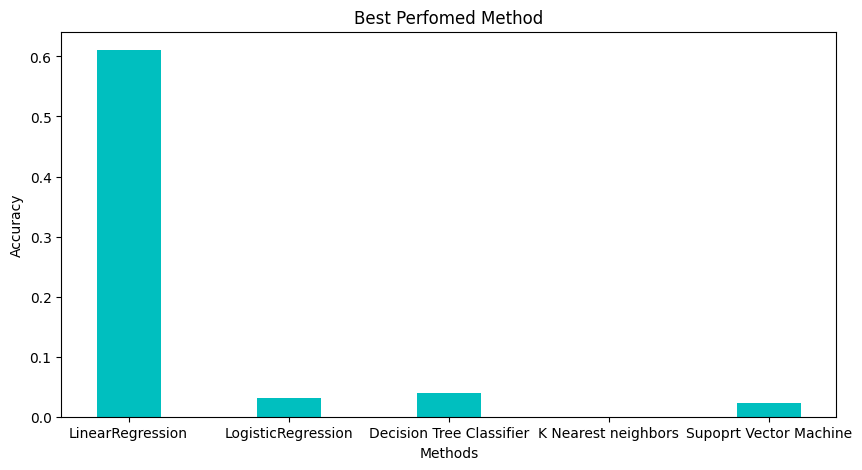

In [166]:
fig = plt.figure(figsize = (10, 5))
 
plt.bar(methods, accu, color = "c", width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")